In [1]:
import csv
import numpy as np
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# figure 13a

In [2]:
file="data/satcat_starlink.csv"
break_num=[0]*24#2020.2-2022.1
with open(file) as f:
    f_csv=csv.reader(f)
    headers=next(f_csv)
    for row in f_csv:
        data=row[3]
        y,m,_=data.split("/")
        if(y=="2020"):
            break_num[int(m)-2]+=1
        elif y=="2021":
            break_num[10+int(m)]+=1
        elif y=="2022":
            break_num[-1]+=1
        else:
            print(y)

In [3]:
sum_num=[]
for i in range(len(break_num)):
    sum_num.append(np.sum(break_num[:i+1]))
print(sum_num)

[2, 2, 3, 5, 5, 6, 13, 41, 54, 58, 61, 62, 62, 66, 70, 72, 78, 87, 99, 111, 123, 133, 151, 161]


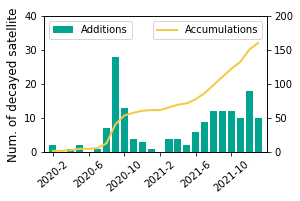

In [4]:
#final version:with different y axis
color=["#00A491","#F6C845","#FF592D","#489DBC"]
fig=plt.figure(figsize=(4,2.5))
location=range(24)
width=0.8
ax = fig.add_subplot(111)
ax.bar(location,break_num,width=width,color=color[0],label="Additions")
ax.set_ylim([0,40])
ax2 = ax.twinx()
ax2.plot(location,sum_num,lw=2,label="Accumulations",color=color[1])
plt.xlim([-1,24])
ax2.set_ylim([0,200])

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
ax.set_ylabel("Num. of decayed satellite",fontsize=12)
ax.set_xticks([0,4,8,12,16,20])
ax.set_xticklabels(["2020-2","2020-6","2020-10","2021-2","2021-6","2021-10"],rotation=40)
plt.savefig("figure13a.pdf",bbox_inches='tight')
# plt.savefig("figure13a.png",bbox_inches='tight')


# figure 13b

In [5]:
# We search the following strings to determine total blocks and CRC error bloacks: `RBID` and `ERROR`.
if __name__ == '__main__':
    filenames = [
        'data/ping-20s-300-no-l1.txt',
    ]
    graph_data = []
    for filename in filenames:
        
        with open(filename) as f:
            lines = f.readlines()
            timestamps = []
            has_error = []
            total_error = 0
            total_dl_cnt = 0
            for line in lines:
                has_error.append(line.find('ERROR') != -1)
                total_error += (has_error[-1] == True)
                if line.find('RBID') != -1:
                    total_dl_cnt += 1
            print('filename:', filename, 'crc error rate: ', total_error / total_dl_cnt)
        with open(filename) as f:
            lines = f.readlines()
            current_total, current_bit_error = 0, 0
            current_time_secs = 0
            global_start_time = None   
            window = 10
            current_start_time = None
            error_rates = []

            for line in lines:
                ts_str = line[1: line.find(']')]
                ts = None
                try:
                    ts = datetime.datetime.strptime(ts_str, '%Y-%m-%d %H:%M:%S.%f')
                except:
                    try:
                        ts = datetime.datetime.strptime(ts_str, '%Y-%m-%d %H:%M:%S')
                    except:
                        pass
                if current_start_time is None and ts is not None:
                    current_start_time = ts
                    global_start_time = ts
                if ts is not None:
                    current_time_secs = (ts - current_start_time).total_seconds()
                if current_time_secs > window:
                    if current_total != 0:
                        error_rates.append({
                            'time': (ts - global_start_time).total_seconds(),
                            'error_rate': current_bit_error / current_total
                        })
                    current_time_secs, current_total, current_bit_error = 0, 0, 0
                    current_start_time = ts
                if line.find('RBID') != -1:
                    current_total += 1
                if line.find('ERROR') != -1:
                    current_bit_error += 1
            graph_data.append(error_rates)
    for i, error_rates in enumerate(graph_data): 
        times = [item['time'] for item in error_rates]
        rates = [item['error_rate'] for item in error_rates]
        # print(len(rates))
        # print(rates)



filename: data/ping-20s-300-no-l1.txt crc error rate:  0.005522905898180273


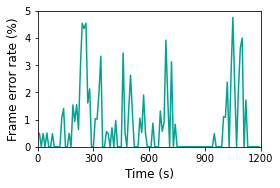

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(4,2.5))
x=range(95)
name_s=["Radio/session only","6b","Session & mobility","All functions"]
ls=["-","--","-","--"]
color=["#00A491","#F6C845","#FF592D","#278BB0"]

for i in range(5):
    rates.append(0)
x=range(len(rates))
plt.ylim(0, 5)
plt.xlim(0, 120)
plt.plot([item *100 for item in rates],color=color[0],lw=1.5)
my_x_ticks = np.arange(0, 150, 30)
xLim= [0,300,600,900,1200]
plt.xticks(my_x_ticks,xLim)
plt.xlabel("Time (s)",fontsize=12)
plt.ylabel("Frame error rate (%)",fontsize=12)
plt.savefig("figure13b.pdf",bbox_inches='tight')
# plt.savefig("figure13b.png",bbox_inches='tight')
plt.show()